# Risk Management Overview of the QIG Portfolio

In [ ]:
# Import relevant functions
from data.DataCollector import *
from models.Viewer import *
from stress_testing.rare_events import *

# Such that above files get loaded properly
%load_ext autoreload
%autoreload 2

import importlib
import models.Portfolio as pm
importlib.reload(pm)

# Define the tickers in our portfolio
current_portfolio = [
    "ADYEN.AS",   # Adyen NV (Euronext Amsterdam)
    "COFB.BR",    # Cofinimmo SA (Euronext Brussels)
    "ENR.DE",     # Siemens Energy AG
    "RHM.DE",     # Rheinmetall AG
    "UMI.BR",     # Umicore SA
    "ENPH",       # Enphase Energy Inc
    "MAS",        # Masco Corp
    "PAYC",       # Paycom Software Inc
    "PLTR",       # Palantir Technologies Inc
    "PODD",       # Insulet Corp
    "TPR",        # Tapestry Inc
    "TSLA",       # Tesla Inc
    "UAL",        # United Airlines Holdings Inc
    "VRTX",       # Vertex Pharmaceuticals Inc
    "WBD"         # Warner Bros Discovery Inc
]

# Define total amount of years T and number of paths M to simulate. We assume daily (252) returns
T, M = 1, 100000
# Define budget; currently not utilized
budget = 0
# Specify weight allocation method (equal weighted method or market cap method, ML method comes at the end)
method = "manual"

# Download the required Yahoo Finance stock data
master_data = fetch_master_data(current_portfolio)
historic_prices = fetch_history(current_portfolio, start="2015-01-01", end="2025-10-17", interval="1d")

# Estimate the historic mean and standard deviation of each stock
mu, sigma = pm.Stock.estimate_simulation_params(historic_prices)

# Make stock objects which can be added to the portfolio
assets = {}
for ticker, row in master_data.iterrows():
    assets[ticker] = pm.Stock(
            ticker = ticker,
            sector = row["sector"],
            asset_class = row["asset_class"],
            S0 = historic_prices[ticker].iloc[0],
            transaction_price = historic_prices[ticker].iloc[-1],
            current_price = row["current_price"],
            market_cap = master_data.loc[ticker, "market_cap"],
            mu = mu[ticker],          
            sigma = sigma[ticker],       
        )

print(historic_prices)

# Create portfolio object
portfolio = pm.Portfolio(budget, [assets[key] for key,_ in assets.items()])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<string>:25: FutureWarning: YF.download() has changed argument auto_adjust default to True
<string>:34: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead


               ADYEN.AS    COFB.BR      ENR.DE       RHM.DE     UMI.BR  \
Date                                                                     
2015-01-02          NaN  60.710278         NaN    36.018719  15.193033   
2015-01-05          NaN  60.609648         NaN    34.346905  14.825167   
2015-01-06          NaN  60.960751         NaN    34.419828  14.758624   
2015-01-07          NaN  61.464220         NaN    34.142556  14.572708   
2015-01-08          NaN  62.086299         NaN    35.322724  14.788164   
...                 ...        ...         ...          ...        ...   
2025-10-10  1697.491212  81.312101  122.604300  2176.804656  19.061498   
2025-10-13  1715.300158  83.479328  125.886136  2180.672750  19.712492   
2025-10-14  1689.222098  82.298105  122.782063  2126.564486  19.814005   
2025-10-15  1691.147456  82.956260  122.868085  2024.596844  20.675252   
2025-10-16  1705.487773  84.494087  122.635799  2066.640264  19.845338   

                 ENPH        MAS     

<string>:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
<string>:34: FutureWarning: YF.download() has changed argument auto_adjust default to True
<string>:34: FutureWarning: YF.download() has changed argument auto_adjust default to True


## Analyze correlation matrix


Top 3 most strongly positively correlated pairs:
UAL   TPR     0.484062
TPR   MAS     0.471474
TSLA  PLTR    0.450778
dtype: float64

Top 3 most strongly negatively correlated pairs:
PAYC  RHM.DE    0.001237
PODD  RHM.DE   -0.001303
MAS   RHM.DE   -0.020019
dtype: float64


/Users/LaptopvanFrank/Desktop/QIG/Risk/QIG-RM/models/Viewer.py:47: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df.pct_change().dropna()


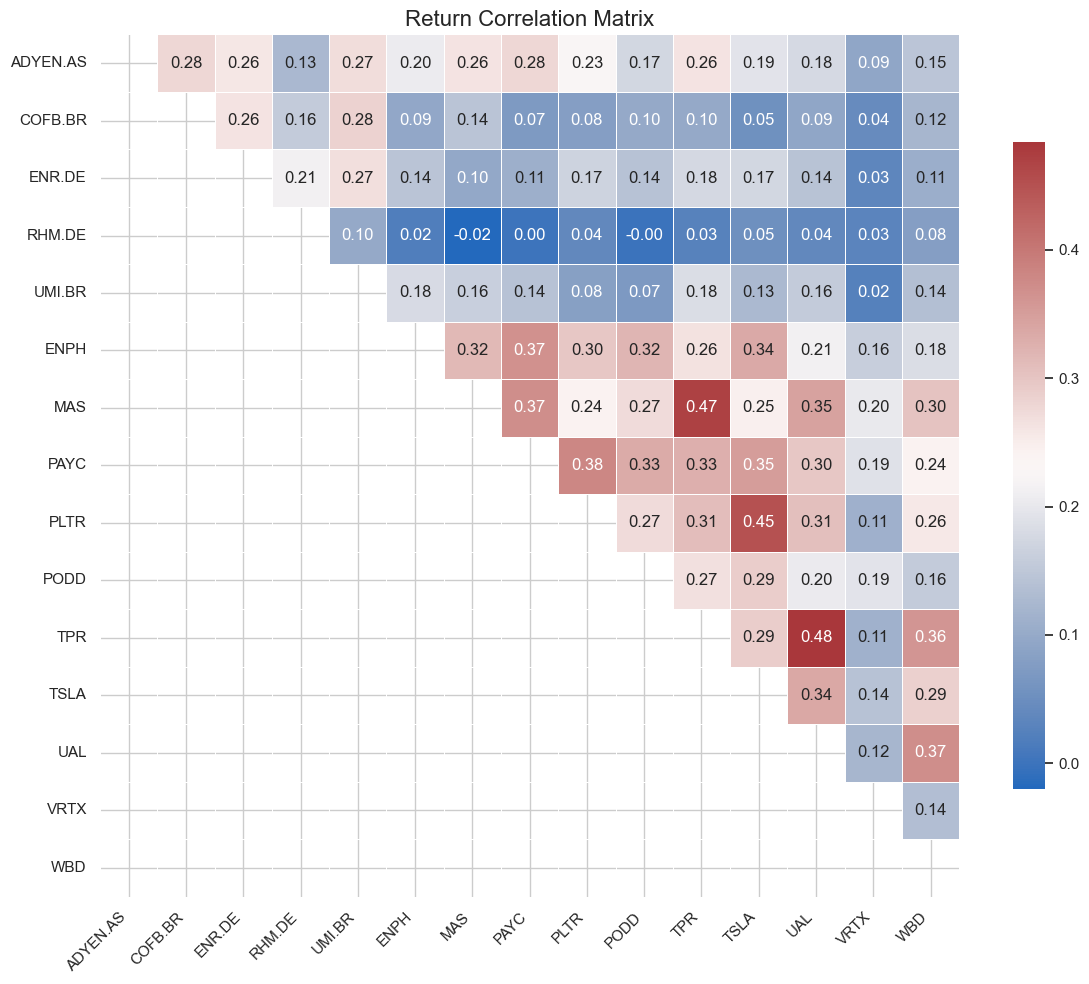

In [74]:
# Look at var-covar matrix
correlation_analysis(historic_prices)

               ADYEN.AS    COFB.BR      ENR.DE       RHM.DE     UMI.BR  \
Date                                                                     
2015-01-02          NaN  60.710278         NaN    36.018719  15.193033   
2015-01-05          NaN  60.609648         NaN    34.346905  14.825167   
2015-01-06          NaN  60.960751         NaN    34.419828  14.758624   
2015-01-07          NaN  61.464220         NaN    34.142556  14.572708   
2015-01-08          NaN  62.086299         NaN    35.322724  14.788164   
...                 ...        ...         ...          ...        ...   
2025-10-10  1697.491212  81.312101  122.604300  2176.804656  19.061498   
2025-10-13  1715.300158  83.479328  125.886136  2180.672750  19.712492   
2025-10-14  1689.222098  82.298105  122.782063  2126.564486  19.814005   
2025-10-15  1691.147456  82.956260  122.868085  2024.596844  20.675252   
2025-10-16  1705.487773  84.494087  122.635799  2066.640264  19.845338   

                 ENPH        MAS     

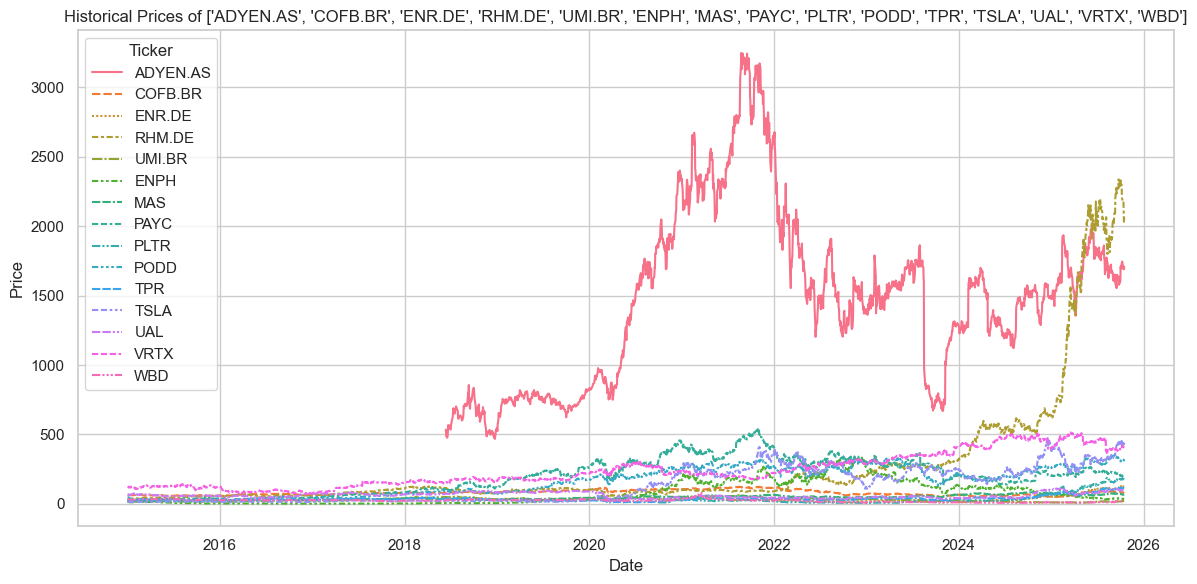

In [75]:
# Plot current - and historic prices of particular stocks on the basis of the asset tickers, assets desired to be plotted need to be in list format 
# If user wants to see historic prices in terminal, set show_prices = True
stocks_to_fetch = current_portfolio # For example index 0 and 1
plot_historical_prices(historic_prices, stocks_to_fetch, show_prices = True)

In [76]:
# Calculate corresponding portfolio weights using a specified method 
weights = portfolio.asset_allocation(method)

df = portfolio.display_portfolio(weights, method) # Automatically prints portfolio info



=========== Current Portfolio Characteristics on 16-10-2025 ===========

Portfolio Value after Purchase in USD: $7,053.67

Portfolio Value currently in USD: $7,010.98

                          sector asset class  quantity  purchase price  \
ADYEN.AS              Technology      EQUITY    0.2740     1705.487773   
COFB.BR              Real Estate      EQUITY    6.0000       84.494087   
ENR.DE               Industrials      EQUITY    3.7632      122.635799   
RHM.DE               Industrials      EQUITY    0.2265     2066.640264   
UMI.BR               Industrials      EQUITY   23.1614       19.845338   
ENPH                  Technology      EQUITY   12.4613       37.560001   
MAS                  Industrials      EQUITY    6.8539       68.029999   
PAYC                  Technology      EQUITY    2.4376      200.490005   
PLTR                  Technology      EQUITY    2.5795      178.119995   
PODD                  Healthcare      EQUITY    1.4817      316.290009   
TPR            Co


## Simulate Portfolio paths over a **one-month** horizon using a GBM; calculate VaR and CVaR.

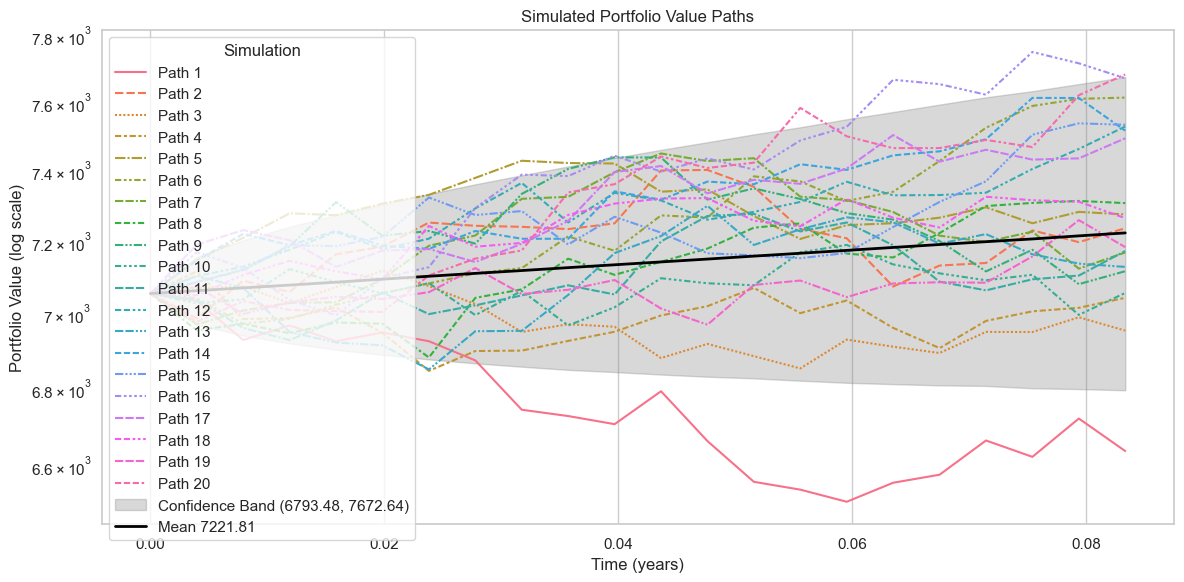

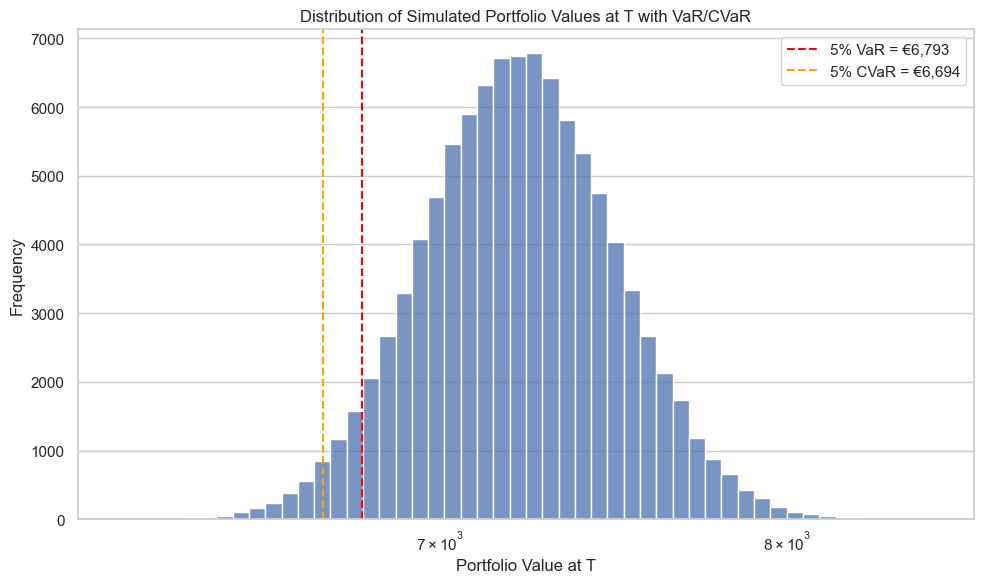

In [77]:
# Simulate 100.000 portfolio paths and plot a number of the trajectories which can be specified by n_paths, for 1 month
T=1/12
t, port_paths = portfolio.simulate_portfolio_GBM(df, T, M)

# Trajectories are plotted in log-scale on y-axis because paths can explode
n_paths_to_plot = 20
plot_portfolio_trajectories(t, port_paths, n_paths = n_paths_to_plot)

# Demonstrate the impact of risk and uncertainty, plots distribution of terminal portfolio values including VaR/CVaR
histogram_uncertainty(port_paths)

## Simulate Portfolio paths over a **one-month** horizon using a CorrelatedGBM by means of Cholesky decomposition; calculate VaR and CVaR.

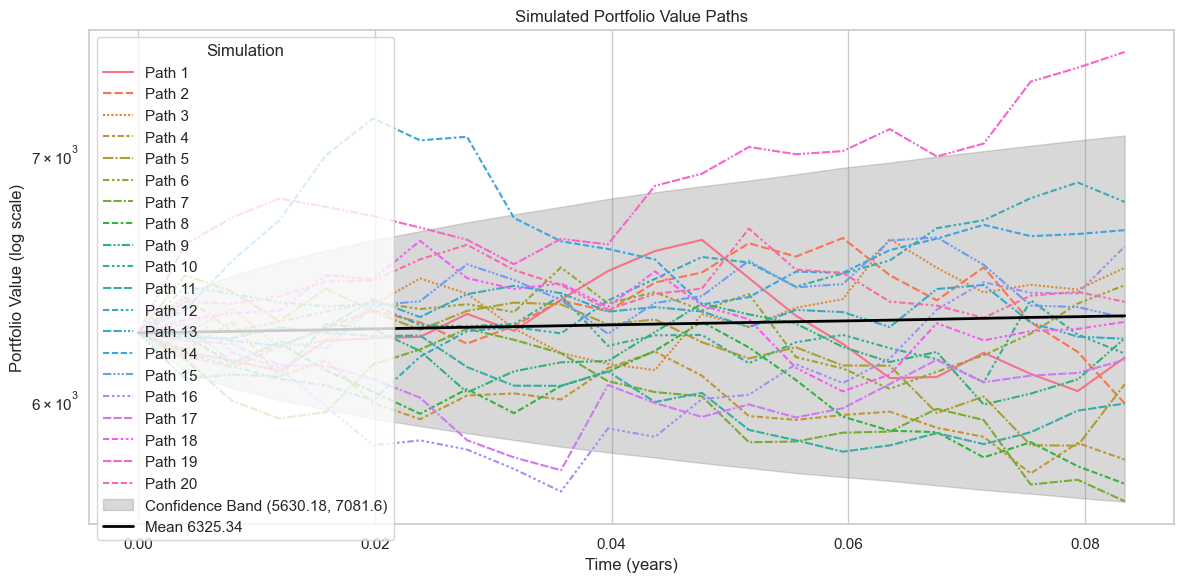

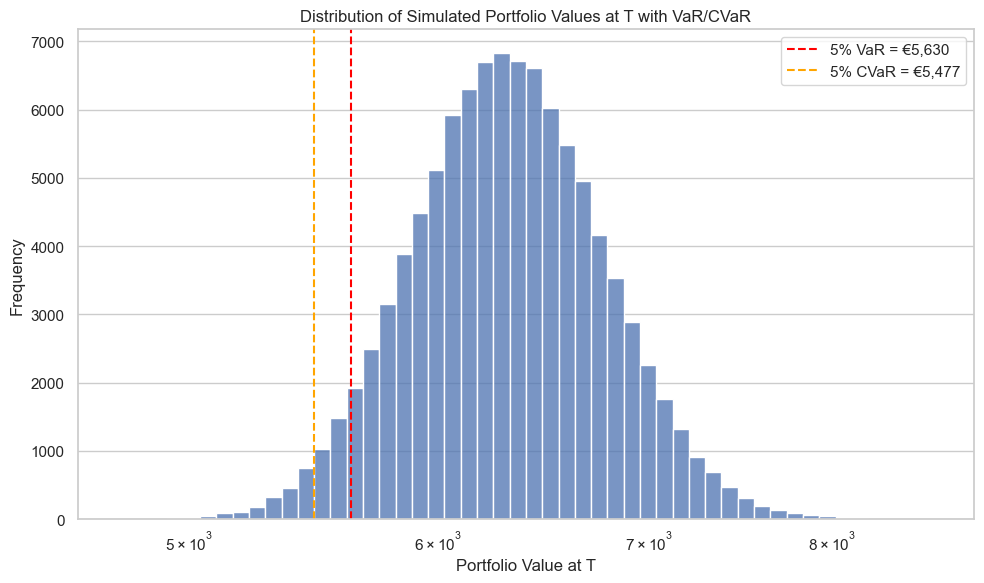

In [32]:
t, port_paths = portfolio.simulate_portfolio_GBM_correlated(df, historic_prices, T=1/12, M=100000, N=252)

# Trajectories are plotted in log-scale on y-axis because paths can explode
n_paths_to_plot = 20
plot_portfolio_trajectories(t, port_paths, n_paths = n_paths_to_plot)

# Demonstrate the impact of risk and uncertainty, plots distribution of terminal portfolio values including VaR/CVaR
histogram_uncertainty(port_paths)

## Simulate Portfolio paths over a **one-month** horizon using a GARCH(1,1) model; calculate VaR and CVaR.

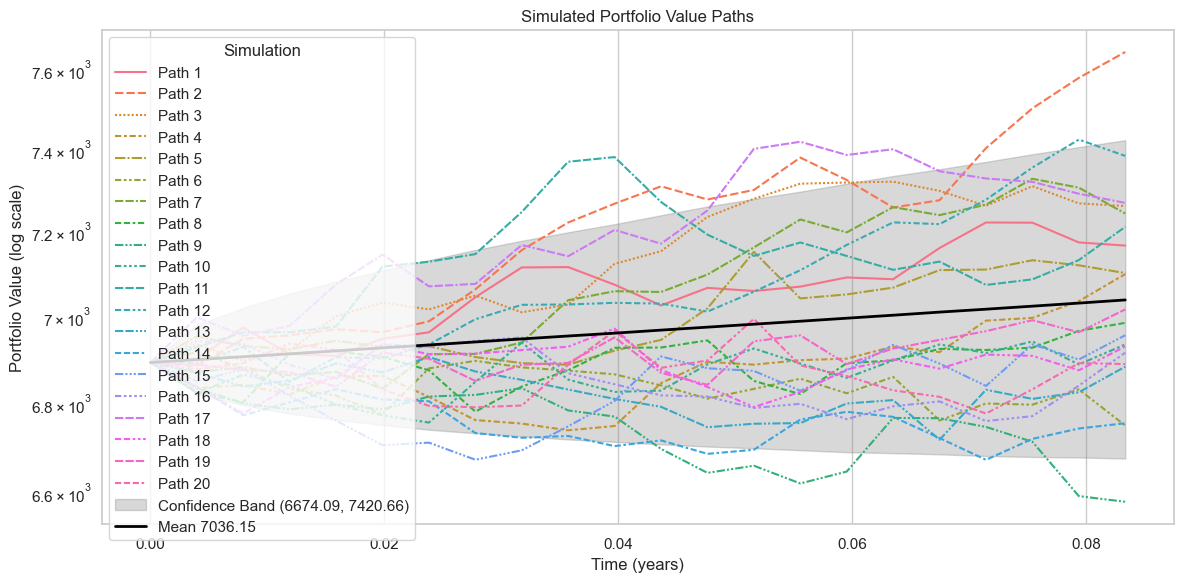

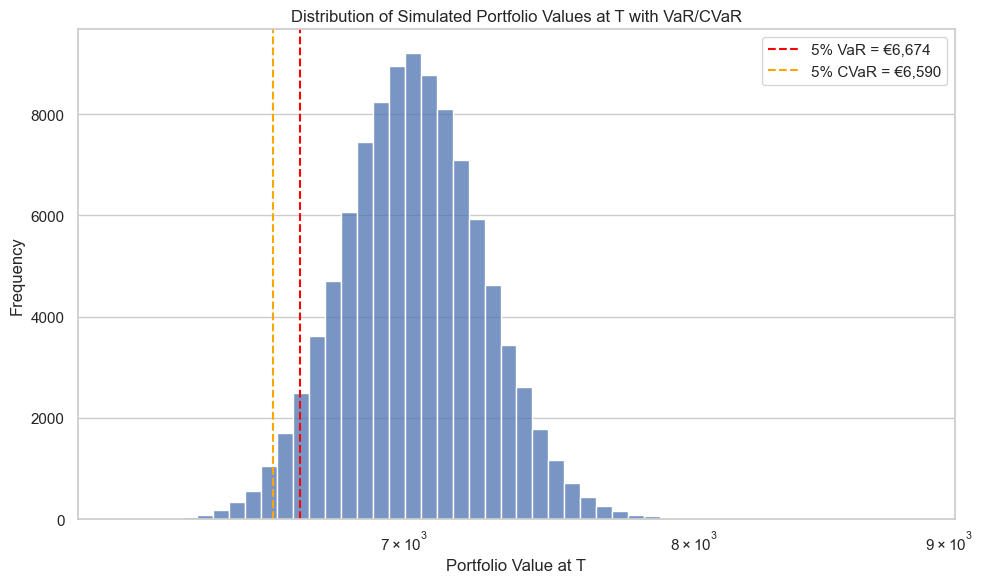

In [17]:
t, port_paths = portfolio.simulate_portfolio_GARCH11(df, historic_prices, T=1/12, M=100000, N=252)

# Trajectories are plotted in log-scale on y-axis because paths can explode
n_paths_to_plot = 20
plot_portfolio_trajectories(t, port_paths, n_paths = n_paths_to_plot)

# Demonstrate the impact of risk and uncertainty, plots distribution of terminal portfolio values including VaR/CVaR
histogram_uncertainty(port_paths)